# **Линейные модели**

## Содержание
1. Описание датасета. Загрузка данных.
2. Разделение выборки на тестовую и обучающую.
3. Обучение моделей. 
    + Линейной модели. 
    + SVM.
    + Дерево решений.
4. Оценка качества моделей.
5. График важности признаков дерева решений.
6. Визуализация дерева решений. Правила дерева решений

## 1. Описание датасета

Возьмем стандартный учебный датасет из Sklearn - The Iris Dataset[https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html]

#### Импорт библиотек

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

#### Загрузка данных

In [4]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = pd.Series(iris.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


Text(0, 0.5, 'petal width')

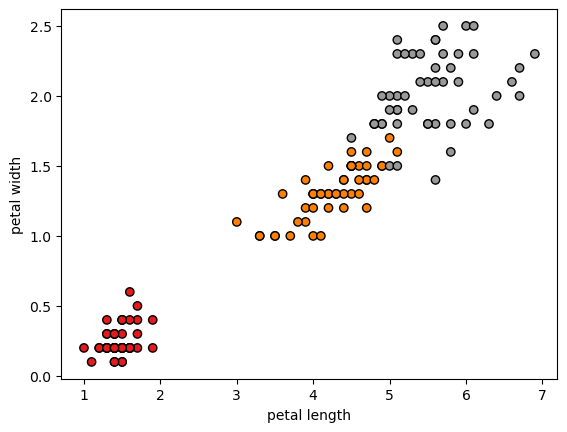

In [6]:
# Посмотрим распределение наших данных
X = df['petal length (cm)']
Y = df['petal width (cm)']
plt.scatter(X, Y, c=df.target, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("petal length")
plt.ylabel("petal width")


<AxesSubplot:>

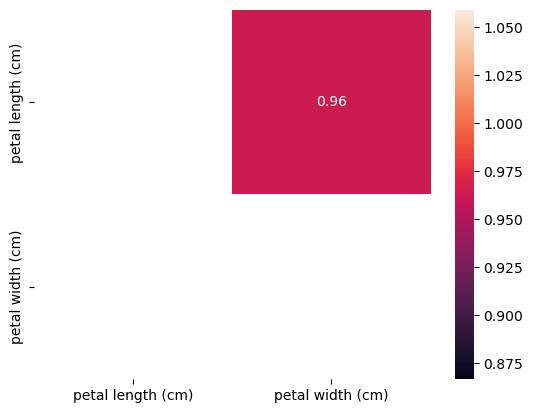

In [10]:
data = df[['petal length (cm)', 'petal width (cm)']]
mask = np.zeros_like(data.corr())
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(method='pearson'), mask=mask, annot=True, fmt='.2f')

Можем увидеть почти полную корреляцию между двумя нашими значениями. Зависимость прямо таки линейная

## 2. Разделение выборки на тестовую и обучающую.

Выполним разбиение с поомщью функции sklearn.model_selection.train_test_split, объем тестовой выборки зададим равным 0.2 от общего объема.

In [8]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(X, Y, random_state=42, test_size = 0.2)


Посмотрим насколько репрезентативны выборки

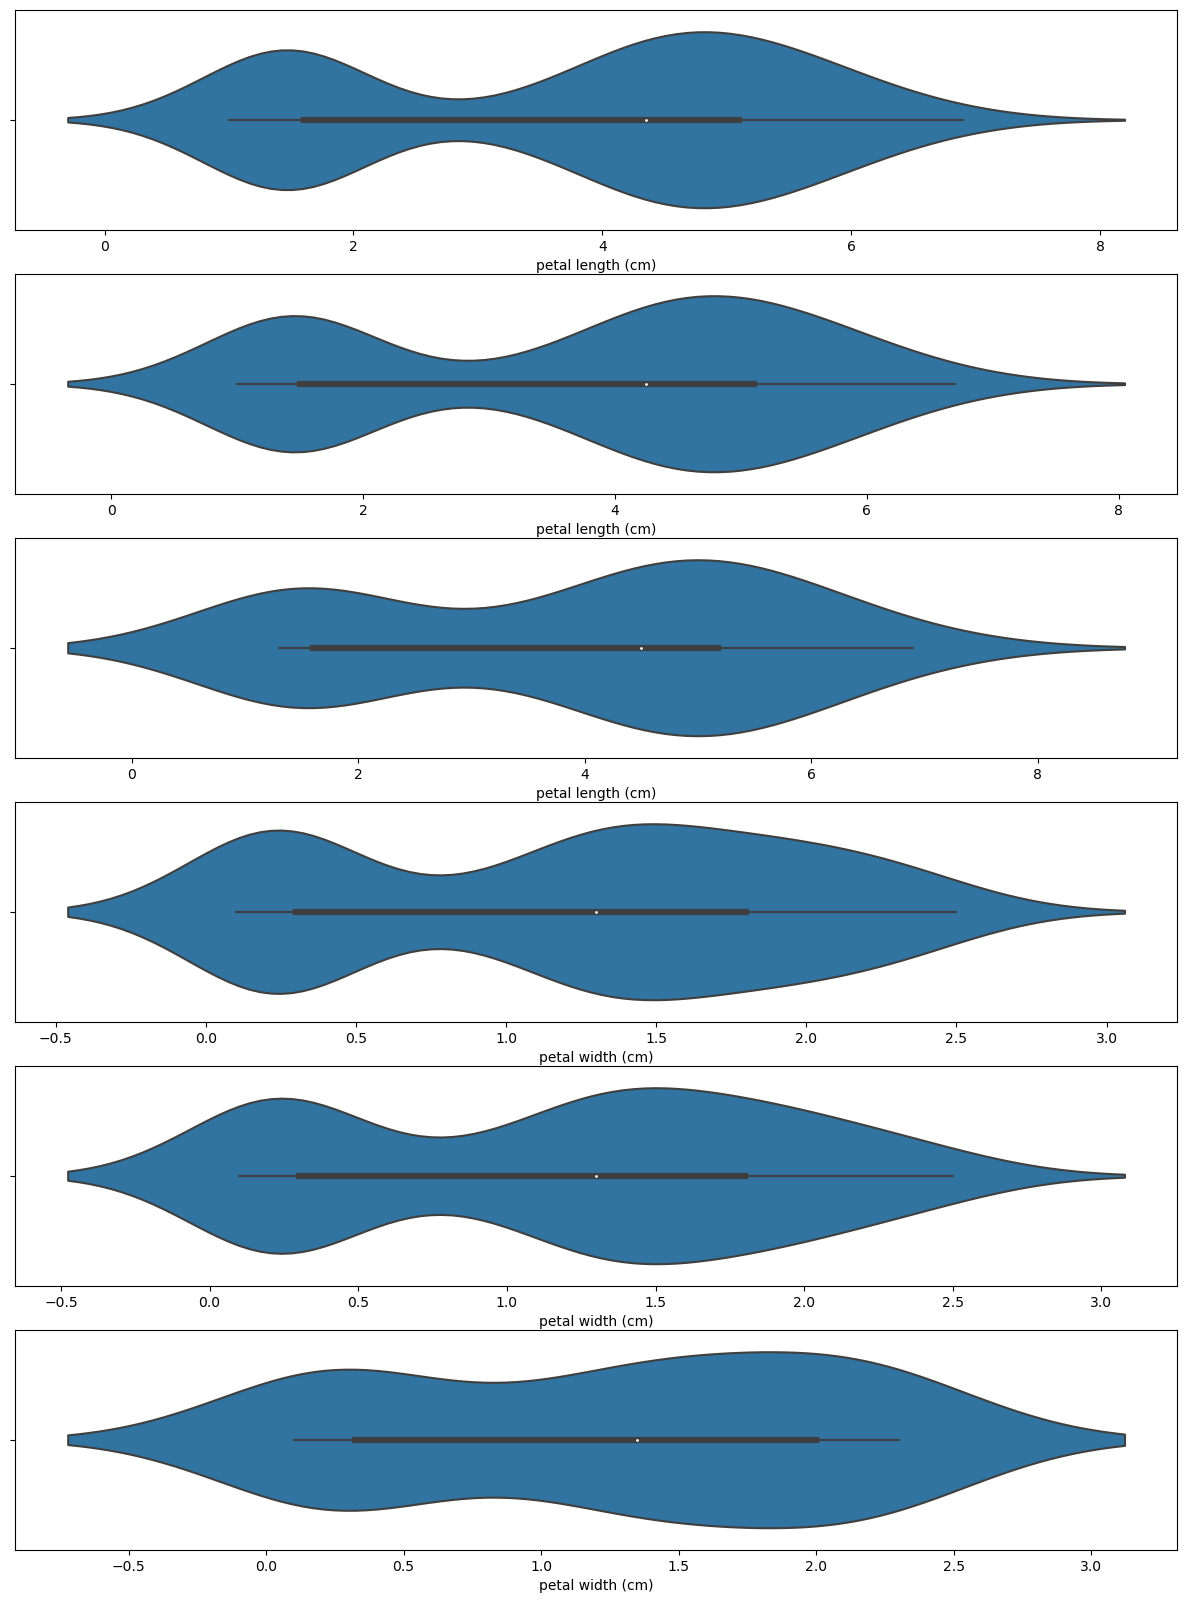

In [9]:
fig, ax = plt.subplots(6, 1, figsize=(15, 20))
sns.violinplot(ax=ax[0], x=X)
sns.violinplot(ax=ax[1], x=x_training_data)
sns.violinplot(ax=ax[2], x=x_test_data)
sns.violinplot(ax=ax[3], x=Y)
sns.violinplot(ax=ax[4], x=y_training_data)
sns.violinplot(ax=ax[5], x=y_test_data)

plt.show()

## 3. Обучение моделей

Линейная модель, которая основывается на предположении о существовании линейной зависимости между нашими данными(длиной и шириной лепестков)